# 0. Setup Paths

In [1]:
import os

In [35]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet_carbast_baru' 
PRETRAINED_MODEL_NAME = 'my_ssd_mobnet_carbast_baru'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [36]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [37]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [38]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [39]:
files

{'PIPELINE_CONFIG': 'Tensorflow\\workspace\\models\\my_ssd_mobnet_carbast_baru\\pipeline.config',
 'TF_RECORD_SCRIPT': 'Tensorflow\\scripts\\generate_tfrecord.py',
 'LABELMAP': 'Tensorflow\\workspace\\annotations\\label_map.pbtxt'}

In [6]:
# https://www.tensorflow.org/install/source_windows

In [11]:
if os.name=='nt':
    !pip install wget
    import wget

In [12]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [14]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 


  0% [                                                                          ]       0 / 1468733
  0% [                                                                          ]    8192 / 1468733
  1% [                                                                          ]   16384 / 1468733
  1% [.                                                                         ]   24576 / 1468733
  2% [.                                                                         ]   32768 / 1468733
  2% [..                                                                        ]   40960 / 1468733
  3% [..                                                                        ]   49152 / 1468733
  3% [..                                                                        ]   57344 / 1468733
  4% [...                                                                       ]   65536 / 1468733
  5% [...                                                                       ]   73728 / 1468733


 46% [..................................                                        ]  688128 / 1468733
 47% [...................................                                       ]  696320 / 1468733
 47% [...................................                                       ]  704512 / 1468733
 48% [...................................                                       ]  712704 / 1468733
 49% [....................................                                      ]  720896 / 1468733
 49% [....................................                                      ]  729088 / 1468733
 50% [.....................................                                     ]  737280 / 1468733
 50% [.....................................                                     ]  745472 / 1468733
 51% [.....................................                                     ]  753664 / 1468733
 51% [......................................                                    ]  761856 / 1468733

        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_pb2.py -> build\lib\object_detection\protos
copying object_detecti

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-39: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-39: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-39: module MAY be using inspect.stack
error: [Errno 2] No such file or directory: 'c:\\users\\chrstn_hry\\desktop\\od\\tensorflow od\\tfodcourse\\tod\\lib\\site-packages\\tensorflow-2.8.0-py3.9-win-amd64.egg\\tensorflow\\include\\external\\cudnn_frontend_archive\\_virtual_includes\\cudnn_frontend\\third_party\\cudnn_frontend\\include\\cudnn_frontend_EngineConfig.h'


Obtaining file:///C:/Users/chrstn_hry/Desktop/OD/Tensorflow%20OD/TFODCourse/Tensorflow/models/research/slim
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Running setup.py develop for slim


In [32]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2022-04-18 18:02:54.391935: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudnn64_8.dll'; dlerror: cudnn64_8.dll not found
2022-04-18 18:02:54.391969: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
Running tests under Python 3.9.8: C:\Users\chrstn_hry\Desktop\OD\Tensorflow OD\TFODCourse\tod\Scripts\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-04-18 18:02:54.397216: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To ena

In [16]:
!pip install tensorflow --upgrade

  Using cached tensorflow-2.8.0-cp39-cp39-win_amd64.whl (438.0 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached grpcio-1.44.0-cp39-cp39-win_amd64.whl (3.4 MB)
  Using cached wrapt-1.14.0-cp39-cp39-win_amd64.whl (36 kB)
  Using cached flatbuffers-2.0-py2.py3-none-any.whl (26 kB)
  Using cached tf_estimator_nightly-2.8.0.dev2021122109-py2.py3-none-any.whl (462 kB)
  Using cached tensorboard-2.8.0-py3-none-any.whl (5.8 MB)
  Using cached libclang-13.0.0-py2.py3-none-win_amd64.whl (13.9 MB)
  Using cached keras-2.8.0-py2.py3-none-any.whl (1.4 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.5.3-py3-none-any.whl (19 kB)
  Using cached h5py-3.6.0-cp39-cp3

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.8.0 requires gin-config, which is not installed.
tf-models-official 2.8.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.8.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.8.0 requires oauth2client, which is not installed.
tf-models-official 2.8.0 requires opencv-python-headless, which is not installed.
tf-models-official 2.8.0 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.8.0 requires pyyaml<6.0,>=5.1, which is not installed.
tf-models-official 2.8.0 requires sacrebleu, which is not installed.
tf-models-official 2.8.0 requires sentencepiece, which is not installed.
tf-models-official 2.8.0 requires seqeval, which is not installed.
tf-models-official 2.8.0 requires tensorflow-addons, which is not installed

In [27]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

  Using cached protobuf-3.20.0-cp39-cp39-win_amd64.whl (904 kB)
  Using cached matplotlib-3.2.0.tar.gz (40.5 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for matplotlib
Failed to build matplotlib
  Running setup.py install for matplotlib: started
  Running setup.py install for matplotlib: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [583 lines of output]
  
  Edit setup.cfg to change the build options; suppress output with --quiet.
  
  BUILDING MATPLOTLIB
    matplotlib: yes [3.2.0]
        python: yes [3.9.8 (tags/v3.9.8:bb3fdcf, Nov  5 2021, 20:48:33) [MSC
                    v.1929 64 bit (AMD64)]]
      platform: yes [win32]
   sample_data: yes [installing]
         tests: no  [skipping due to configuration]
           agg: yes [installing]
         tkagg: yes [installing; run-time loading from Python Tcl/Tk]
        macosx: no  [Mac OS-X only]
  
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.9
  copying lib\pylab.py -> build\lib.win-amd64-3.9
  creating build\lib.win-amd64-3.9\matplotlib
  copying lib\matplotlib\afm.py -> build\lib.win-amd64-3.9\matplotlib
  copying lib\matplotlib\animation.py -> build\lib.win-amd64-3.9\matplotlib
  

In [7]:
import object_detection

In [31]:
!pip install PyYAML

     -------------------------------------- 151.6/151.6 KB 4.4 MB/s eta 0:00:00


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.8.0 requires gin-config, which is not installed.
tf-models-official 2.8.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.8.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.8.0 requires oauth2client, which is not installed.
tf-models-official 2.8.0 requires opencv-python-headless, which is not installed.
tf-models-official 2.8.0 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.8.0 requires sacrebleu, which is not installed.
tf-models-official 2.8.0 requires sentencepiece, which is not installed.
tf-models-official 2.8.0 requires seqeval, which is not installed.
tf-models-official 2.8.0 requires tensorflow-addons, which is not installed.
tf-models-official 2.8.0 requires tensorflow-datasets, which is not instal

In [7]:
!pip list

Package                      Version             Editable project location
---------------------------- ------------------- ---------------------------------------------------------------------------------------
absl-py                      1.0.0
apache-beam                  2.38.0rc1
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asttokens                    2.0.5
astunparse                   1.6.3
attrs                        21.4.0
avro-python3                 1.10.2
backcall                     0.2.0
beautifulsoup4               4.11.1
bleach                       5.0.0
cachetools                   5.0.0
certifi                      2021.10.8
cffi                         1.15.0
charset-normalizer           2.0.12
colorama                     0.4.4
contextlib2                  21.6.0
cycler                       0.11.0
Cython                       3.0.0a10
debugpy                      1.6.0
decorator                    5.1.1
defusedxml                   0.7.

In [31]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}


  0% [                                                                        ]        0 / 30736482
  0% [                                                                        ]     8192 / 30736482
  0% [                                                                        ]    16384 / 30736482
  0% [                                                                        ]    24576 / 30736482
  0% [                                                                        ]    32768 / 30736482
  0% [                                                                        ]    40960 / 30736482
  0% [                                                                        ]    49152 / 30736482
  0% [                                                                        ]    57344 / 30736482
  0% [                                                                        ]    65536 / 30736482
  0% [                                                                        ]    73728 / 30736482


 10% [.......                                                                 ]  3252224 / 30736482
 10% [.......                                                                 ]  3260416 / 30736482
 10% [.......                                                                 ]  3268608 / 30736482
 10% [.......                                                                 ]  3276800 / 30736482
 10% [.......                                                                 ]  3284992 / 30736482
 10% [.......                                                                 ]  3293184 / 30736482
 10% [.......                                                                 ]  3301376 / 30736482
 10% [.......                                                                 ]  3309568 / 30736482
 10% [.......                                                                 ]  3317760 / 30736482
 10% [.......                                                                 ]  3325952 / 30736482


 13% [.........                                                               ]  4202496 / 30736482
 13% [.........                                                               ]  4210688 / 30736482
 13% [.........                                                               ]  4218880 / 30736482
 13% [.........                                                               ]  4227072 / 30736482
 13% [.........                                                               ]  4235264 / 30736482
 13% [.........                                                               ]  4243456 / 30736482
 13% [.........                                                               ]  4251648 / 30736482
 13% [.........                                                               ]  4259840 / 30736482
 13% [.........                                                               ]  4268032 / 30736482
 13% [..........                                                              ]  4276224 / 30736482


 27% [...................                                                     ]  8396800 / 30736482
 27% [...................                                                     ]  8404992 / 30736482
 27% [...................                                                     ]  8413184 / 30736482
 27% [...................                                                     ]  8421376 / 30736482
 27% [...................                                                     ]  8429568 / 30736482
 27% [...................                                                     ]  8437760 / 30736482
 27% [...................                                                     ]  8445952 / 30736482
 27% [...................                                                     ]  8454144 / 30736482
 27% [...................                                                     ]  8462336 / 30736482
 27% [...................                                                     ]  8470528 / 30736482


 39% [............................                                            ] 11993088 / 30736482
 39% [............................                                            ] 12001280 / 30736482
 39% [............................                                            ] 12009472 / 30736482
 39% [............................                                            ] 12017664 / 30736482
 39% [............................                                            ] 12025856 / 30736482
 39% [............................                                            ] 12034048 / 30736482
 39% [............................                                            ] 12042240 / 30736482
 39% [............................                                            ] 12050432 / 30736482
 39% [............................                                            ] 12058624 / 30736482
 39% [............................                                            ] 12066816 / 30736482


 43% [...............................                                         ] 13475840 / 30736482
 43% [...............................                                         ] 13484032 / 30736482
 43% [...............................                                         ] 13492224 / 30736482
 43% [...............................                                         ] 13500416 / 30736482
 43% [...............................                                         ] 13508608 / 30736482
 43% [...............................                                         ] 13516800 / 30736482
 44% [...............................                                         ] 13524992 / 30736482
 44% [...............................                                         ] 13533184 / 30736482
 44% [...............................                                         ] 13541376 / 30736482
 44% [...............................                                         ] 13549568 / 30736482


 47% [..................................                                      ] 14647296 / 30736482
 47% [..................................                                      ] 14655488 / 30736482
 47% [..................................                                      ] 14663680 / 30736482
 47% [..................................                                      ] 14671872 / 30736482
 47% [..................................                                      ] 14680064 / 30736482
 47% [..................................                                      ] 14688256 / 30736482
 47% [..................................                                      ] 14696448 / 30736482
 47% [..................................                                      ] 14704640 / 30736482
 47% [..................................                                      ] 14712832 / 30736482
 47% [..................................                                      ] 14721024 / 30736482


 51% [....................................                                    ] 15761408 / 30736482
 51% [....................................                                    ] 15769600 / 30736482
 51% [....................................                                    ] 15777792 / 30736482
 51% [....................................                                    ] 15785984 / 30736482
 51% [....................................                                    ] 15794176 / 30736482
 51% [.....................................                                   ] 15802368 / 30736482
 51% [.....................................                                   ] 15810560 / 30736482
 51% [.....................................                                   ] 15818752 / 30736482
 51% [.....................................                                   ] 15826944 / 30736482
 51% [.....................................                                   ] 15835136 / 30736482


 55% [.......................................                                 ] 16990208 / 30736482
 55% [.......................................                                 ] 16998400 / 30736482
 55% [.......................................                                 ] 17006592 / 30736482
 55% [.......................................                                 ] 17014784 / 30736482
 55% [.......................................                                 ] 17022976 / 30736482
 55% [.......................................                                 ] 17031168 / 30736482
 55% [.......................................                                 ] 17039360 / 30736482
 55% [.......................................                                 ] 17047552 / 30736482
 55% [.......................................                                 ] 17055744 / 30736482
 55% [.......................................                                 ] 17063936 / 30736482


 59% [..........................................                              ] 18276352 / 30736482
 59% [..........................................                              ] 18284544 / 30736482
 59% [..........................................                              ] 18292736 / 30736482
 59% [..........................................                              ] 18300928 / 30736482
 59% [..........................................                              ] 18309120 / 30736482
 59% [..........................................                              ] 18317312 / 30736482
 59% [..........................................                              ] 18325504 / 30736482
 59% [..........................................                              ] 18333696 / 30736482
 59% [..........................................                              ] 18341888 / 30736482
 59% [..........................................                              ] 18350080 / 30736482


 63% [.............................................                           ] 19521536 / 30736482
 63% [.............................................                           ] 19529728 / 30736482
 63% [.............................................                           ] 19537920 / 30736482
 63% [.............................................                           ] 19546112 / 30736482
 63% [.............................................                           ] 19554304 / 30736482
 63% [.............................................                           ] 19562496 / 30736482
 63% [.............................................                           ] 19570688 / 30736482
 63% [.............................................                           ] 19578880 / 30736482
 63% [.............................................                           ] 19587072 / 30736482
 63% [.............................................                           ] 19595264 / 30736482


 67% [................................................                        ] 20897792 / 30736482
 68% [................................................                        ] 20905984 / 30736482
 68% [................................................                        ] 20914176 / 30736482
 68% [.................................................                       ] 20922368 / 30736482
 68% [.................................................                       ] 20930560 / 30736482
 68% [.................................................                       ] 20938752 / 30736482
 68% [.................................................                       ] 20946944 / 30736482
 68% [.................................................                       ] 20955136 / 30736482
 68% [.................................................                       ] 20963328 / 30736482
 68% [.................................................                       ] 20971520 / 30736482


 71% [...................................................                     ] 22118400 / 30736482
 71% [...................................................                     ] 22126592 / 30736482
 72% [...................................................                     ] 22134784 / 30736482
 72% [...................................................                     ] 22142976 / 30736482
 72% [...................................................                     ] 22151168 / 30736482
 72% [...................................................                     ] 22159360 / 30736482
 72% [...................................................                     ] 22167552 / 30736482
 72% [...................................................                     ] 22175744 / 30736482
 72% [...................................................                     ] 22183936 / 30736482
 72% [...................................................                     ] 22192128 / 30736482


 75% [......................................................                  ] 23330816 / 30736482
 75% [......................................................                  ] 23339008 / 30736482
 75% [......................................................                  ] 23347200 / 30736482
 75% [......................................................                  ] 23355392 / 30736482
 76% [......................................................                  ] 23363584 / 30736482
 76% [......................................................                  ] 23371776 / 30736482
 76% [......................................................                  ] 23379968 / 30736482
 76% [......................................................                  ] 23388160 / 30736482
 76% [......................................................                  ] 23396352 / 30736482
 76% [......................................................                  ] 23404544 / 30736482


 79% [.........................................................               ] 24543232 / 30736482
 79% [.........................................................               ] 24551424 / 30736482
 79% [.........................................................               ] 24559616 / 30736482
 79% [.........................................................               ] 24567808 / 30736482
 79% [.........................................................               ] 24576000 / 30736482
 79% [.........................................................               ] 24584192 / 30736482
 80% [.........................................................               ] 24592384 / 30736482
 80% [.........................................................               ] 24600576 / 30736482
 80% [.........................................................               ] 24608768 / 30736482
 80% [.........................................................               ] 24616960 / 30736482


 83% [............................................................            ] 25755648 / 30736482
 83% [............................................................            ] 25763840 / 30736482
 83% [............................................................            ] 25772032 / 30736482
 83% [............................................................            ] 25780224 / 30736482
 83% [............................................................            ] 25788416 / 30736482
 83% [............................................................            ] 25796608 / 30736482
 83% [............................................................            ] 25804800 / 30736482
 83% [............................................................            ] 25812992 / 30736482
 84% [............................................................            ] 25821184 / 30736482
 84% [............................................................            ] 25829376 / 30736482


 87% [...............................................................         ] 26918912 / 30736482
 87% [...............................................................         ] 26927104 / 30736482
 87% [...............................................................         ] 26935296 / 30736482
 87% [...............................................................         ] 26943488 / 30736482
 87% [...............................................................         ] 26951680 / 30736482
 87% [...............................................................         ] 26959872 / 30736482
 87% [...............................................................         ] 26968064 / 30736482
 87% [...............................................................         ] 26976256 / 30736482
 87% [...............................................................         ] 26984448 / 30736482
 87% [...............................................................         ] 26992640 / 30736482


 91% [..................................................................      ] 28237824 / 30736482
 91% [..................................................................      ] 28246016 / 30736482
 91% [..................................................................      ] 28254208 / 30736482
 91% [..................................................................      ] 28262400 / 30736482
 91% [..................................................................      ] 28270592 / 30736482
 92% [..................................................................      ] 28278784 / 30736482
 92% [..................................................................      ] 28286976 / 30736482
 92% [..................................................................      ] 28295168 / 30736482
 92% [..................................................................      ] 28303360 / 30736482
 92% [..................................................................      ] 28311552 / 30736482


 95% [....................................................................    ] 29425664 / 30736482
 95% [....................................................................    ] 29433856 / 30736482
 95% [....................................................................    ] 29442048 / 30736482
 95% [....................................................................    ] 29450240 / 30736482
 95% [.....................................................................   ] 29458432 / 30736482
 95% [.....................................................................   ] 29466624 / 30736482
 95% [.....................................................................   ] 29474816 / 30736482
 95% [.....................................................................   ] 29483008 / 30736482
 95% [.....................................................................   ] 29491200 / 30736482
 95% [.....................................................................   ] 29499392 / 30736482

100% [........................................................................] 30736482 / 30736482        1 file(s) moved.


x efficientdet_d0_coco17_tpu-32/
x efficientdet_d0_coco17_tpu-32/checkpoint/
x efficientdet_d0_coco17_tpu-32/checkpoint/ckpt-0.data-00000-of-00001
x efficientdet_d0_coco17_tpu-32/checkpoint/checkpoint
x efficientdet_d0_coco17_tpu-32/checkpoint/ckpt-0.index
x efficientdet_d0_coco17_tpu-32/pipeline.config
x efficientdet_d0_coco17_tpu-32/saved_model/
x efficientdet_d0_coco17_tpu-32/saved_model/saved_model.pb
x efficientdet_d0_coco17_tpu-32/saved_model/assets/
x efficientdet_d0_coco17_tpu-32/saved_model/variables/
x efficientdet_d0_coco17_tpu-32/saved_model/variables/variables.data-00000-of-00001
x efficientdet_d0_coco17_tpu-32/saved_model/variables/variables.index


# 2. Create Label Map

In [10]:
labels = [{'name':'bus', 'id':1}, {'name':'car', 'id':2}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [ ]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [37]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

Cloning into 'Tensorflow\scripts'...


In [39]:
!pip install pytz

  Using cached pytz-2022.1-py2.py3-none-any.whl (503 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.38.0rc1 requires cloudpickle<3,>=2.0.0, which is not installed.
apache-beam 2.38.0rc1 requires crcmod<2.0,>=1.7, which is not installed.
apache-beam 2.38.0rc1 requires dill<0.3.2,>=0.3.1.1, which is not installed.
apache-beam 2.38.0rc1 requires fastavro<2,>=0.23.6, which is not installed.
apache-beam 2.38.0rc1 requires hdfs<3.0.0,>=2.1.0, which is not installed.
apache-beam 2.38.0rc1 requires httplib2<0.20.0,>=0.8, which is not installed.
apache-beam 2.38.0rc1 requires oauth2client<5,>=2.0.1, which is not installed.
apache-beam 2.38.0rc1 requires orjson<4.0, which is not installed.
apache-beam 2.38.0rc1 requires proto-plus<2,>=1.7.1, which is not installed.
apache-beam 2.38.0rc1 requires pyarrow<7.0.0,>=0.15.1, which is not installed.
apache-beam 2.38.0rc1 requires pydot<2,>=1.2.0, which is not insta

In [33]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train2')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train2.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test2')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test2.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train2.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test2.record


# 4. Copy Model Config to Training Folder

In [32]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 5. Update Config For Transfer Learning

In [40]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [74]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [75]:
config

{'model': ssd {
   num_classes: 2
   image_resizer {
     keep_aspect_ratio_resizer {
       min_dimension: 512
       max_dimension: 512
       pad_to_max_dimension: true
     }
   }
   feature_extractor {
     type: "ssd_efficientnet-b0_bifpn_keras"
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         truncated_normal_initializer {
           mean: 0.0
           stddev: 0.029999999329447746
         }
       }
       activation: SWISH
       batch_norm {
         decay: 0.9900000095367432
         scale: true
         epsilon: 0.0010000000474974513
       }
       force_use_bias: true
     }
     bifpn {
       min_level: 3
       max_level: 7
       num_iterations: 3
       num_filters: 64
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 1.0
       x_scale: 1.0
       height_scale: 1.0
       width_scale: 1.0
     }
   }
   matcher {
     argmax_match

In [14]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [15]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 2
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train2.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test2.record')]

In [16]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [76]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [77]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=3000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [78]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_efficientdet_d0_carbast_baru --pipeline_config_path=Tensorflow\workspace\models\my_efficientdet_d0_carbast_baru\pipeline.config --num_train_steps=3000


In [164]:
pip install --upgrade tensorflow-gpu

  Using cached tensorflow_gpu-2.8.0-cp39-cp39-win_amd64.whl (438.0 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\chrstn_hry\\Desktop\\OD\\Tensorflow OD\\TFODCourse\\tod\\Lib\\site-packages\\tensorflow\\lite\\experimental\\microfrontend\\python\\ops\\_audio_microfrontend_op.so'
Check the permissions.



In [ ]:
!{command}

# 7. Evaluate the Model

In [79]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [80]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_efficientdet_d0_carbast_baru --pipeline_config_path=Tensorflow\workspace\models\my_efficientdet_d0_carbast_baru\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_efficientdet_d0_carbast_baru


In [22]:
!{command}

^C


# 8. Load Train Model From Checkpoint

In [41]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [42]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-4')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

In [43]:
paths

{'WORKSPACE_PATH': 'Tensorflow\\workspace',
 'SCRIPTS_PATH': 'Tensorflow\\scripts',
 'APIMODEL_PATH': 'Tensorflow\\models',
 'ANNOTATION_PATH': 'Tensorflow\\workspace\\annotations',
 'IMAGE_PATH': 'Tensorflow\\workspace\\images',
 'MODEL_PATH': 'Tensorflow\\workspace\\models',
 'PRETRAINED_MODEL_PATH': 'Tensorflow\\workspace\\pre-trained-models',
 'CHECKPOINT_PATH': 'Tensorflow\\workspace\\models\\my_ssd_mobnet_carbast_baru',
 'OUTPUT_PATH': 'Tensorflow\\workspace\\models\\my_ssd_mobnet_carbast_baru\\export',
 'TFJS_PATH': 'Tensorflow\\workspace\\models\\my_ssd_mobnet_carbast_baru\\tfjsexport',
 'TFLITE_PATH': 'Tensorflow\\workspace\\models\\my_ssd_mobnet_carbast_baru\\tfliteexport',
 'PROTOC_PATH': 'Tensorflow\\protoc'}

# 9. Detect from an Image

In [44]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [45]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [48]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'car24.jpg')

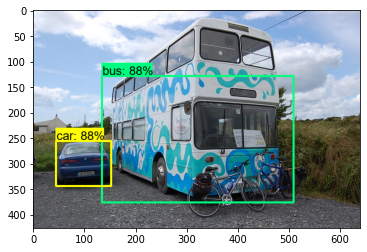

In [49]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

### 10. Real Time Detections from your Webcam

In [145]:
!pip uninstall opencv-python-headless -y

In [163]:
!pip list

Package                      Version             Editable project location
---------------------------- ------------------- ---------------------------------------------------------------------------------------
absl-py                      1.0.0
apache-beam                  2.38.0rc1
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asttokens                    2.0.5
astunparse                   1.6.3
attrs                        21.4.0
avro-python3                 1.10.2
backcall                     0.2.0
beautifulsoup4               4.11.1
bleach                       5.0.0
cachetools                   5.0.0
certifi                      2021.10.8
cffi                         1.15.0
charset-normalizer           2.0.12
colorama                     0.4.4
contextlib2                  21.6.0
cycler                       0.11.0
Cython                       3.0.0a10
debugpy                      1.6.0
decorator                    5.1.1
defusedxml                   0.7.

In [96]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break